In [9]:
import pickle
import numpy as np
from musicprocessor import *

if __name__ == "__main__":
    with open('../data/learningdata.pickle',mode='rb') as f:
        song=pickle.load(f)

    with open('../data/inference.pickle',mode='rb') as f:
        inference=pickle.load(f)
    print(inference)

    inferredtimestamp = []
    for i in range(inference.shape[0]):
        if(inference[i] >= 0.5):
            inferredtimestamp.append([i*512/44100, 2])

    print(len(inferredtimestamp))
    song.timestamp = inferredtimestamp
    song.synthesize(diff=True)
    song.save("../data/inferredmusic.wav")

[0.00021279 0.00021279 0.00021279 ... 0.00021279 0.00021279 0.00021279]
757


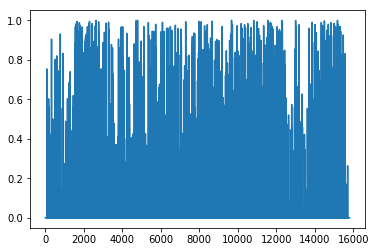

In [24]:
import matplotlib.pyplot as plt

plt.plot(inference)
plt.show()

In [15]:
from scipy.signal import argrelmax
print(argrelmax(inference)[0])
relinf=argrelmax(inference)
inferredtimestamp=[]
for i in range(len(relinf[0])):
    inferredtimestamp.append([relinf[0][i]*512/44100, 2])
song.timestamp = inferredtimestamp
print(len(inferredtimestamp))
song.synthesize(diff=True)
song.save("../data/inferredmusic.wav")

[   66    76    78 ... 15725 15798 15800]
2539
